In [1]:
# Cell 1: Setup and Imports
"""
Phonetic Analysis Notebook
==========================
Analyzing our Hindi-English code-mixed dataset with phonetic representations.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast  # To parse string lists

# Set style for nice plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_colwidth', 100)

print("✓ Libraries loaded successfully!")

✓ Libraries loaded successfully!


In [2]:
# Cell 2: Load the Phonetic Data

# Load all processed datasets
train_df = pd.read_csv('../data/processed/train_phonetic.csv')
val_df = pd.read_csv('../data/processed/val_phonetic.csv')
test_df = pd.read_csv('../data/processed/test_phonetic.csv')

# Combine for overall analysis
all_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

print(f"Dataset Sizes:")
print(f"  Training:   {len(train_df)} samples")
print(f"  Validation: {len(val_df)} samples")
print(f"  Test:       {len(test_df)} samples")
print(f"  Total:      {len(all_df)} samples")

print(f"\nColumns: {list(all_df.columns)}")

Dataset Sizes:
  Training:   150 samples
  Validation: 30 samples
  Test:       30 samples
  Total:      210 samples

Columns: ['text', 'label', 'normalized', 'language_tags', 'phonetic']


In [3]:
# Cell 3: Preview the Data

print("Sample of Processed Data:")
print("=" * 80)

# Show first 5 samples
for idx, row in all_df.head(5).iterrows():
    print(f"\n--- Sample {idx + 1} ({row['label'].upper()}) ---")
    print(f"Original:  {row['text']}")
    print(f"Phonetic:  {row['phonetic']}")
    print(f"Languages: {row['language_tags']}")

Sample of Processed Data:

--- Sample 1 (POSITIVE) ---
Original:  yaar ye movie toh bahut amazing thi
Phonetic:  /jaːr jeː muːviː toː bəhʊt əmeɪzɪŋ tʰiː/
Languages: ['HI', 'HI', 'EN', 'HI', 'HI', 'EN', 'HI']

--- Sample 2 (POSITIVE) ---
Original:  finally exam khatam feeling so happy
Phonetic:  /faɪnəliː ɪgzæm xətəm fiːlɪŋ soʊ hæpiː/
Languages: ['EN', 'EN', 'UNK', 'EN', 'EN', 'EN']

--- Sample 3 (POSITIVE) ---
Original:  kya amazing food mila loved it
Phonetic:  /kjaː əmeɪzɪŋ fuːd mɪlaː loːveːd ɪt/
Languages: ['HI', 'EN', 'EN', 'HI', 'EN', 'EN']

--- Sample 4 (POSITIVE) ---
Original:  bhai seriously this is the best day
Phonetic:  /bʰaːiː seːrɪaʊslj ðɪs ɪz tʰeː best deɪ/
Languages: ['HI', 'EN', 'EN', 'EN', 'HI', 'EN', 'EN']

--- Sample 5 (POSITIVE) ---
Original:  bahut acha experience tha really enjoyed
Phonetic:  /bəhʊt ətʃʰaː ɪkspɪərɪəns tʰaː rɪəliː ɪndʒɔɪd/
Languages: ['HI', 'HI', 'UNK', 'HI', 'EN', 'EN']


In [4]:
# Cell 4: Analyze Language Distribution

def count_languages(lang_tags_str):
    """Count HI, EN, UNK in a language tag string."""
    try:
        tags = ast.literal_eval(lang_tags_str)
        return {
            'hindi': tags.count('HI'),
            'english': tags.count('EN'),
            'unknown': tags.count('UNK'),
            'total': len(tags)
        }
    except:
        return {'hindi': 0, 'english': 0, 'unknown': 0, 'total': 0}

# Apply to all rows
lang_counts = all_df['language_tags'].apply(count_languages)
lang_df = pd.DataFrame(lang_counts.tolist())

# Add to main dataframe
all_df['hindi_words'] = lang_df['hindi']
all_df['english_words'] = lang_df['english']
all_df['total_words'] = lang_df['total']
all_df['hindi_percentage'] = (lang_df['hindi'] / lang_df['total'] * 100).round(1)

# Summary statistics
print("Language Distribution Summary:")
print("=" * 40)
print(f"Total Hindi words:   {lang_df['hindi'].sum()}")
print(f"Total English words: {lang_df['english'].sum()}")
print(f"Total Unknown words: {lang_df['unknown'].sum()}")
print(f"\nAverage Hindi %:     {all_df['hindi_percentage'].mean():.1f}%")
print(f"Average words/text:  {all_df['total_words'].mean():.1f}")

Language Distribution Summary:
Total Hindi words:   490
Total English words: 382
Total Unknown words: 546

Average Hindi %:     34.3%
Average words/text:  6.8


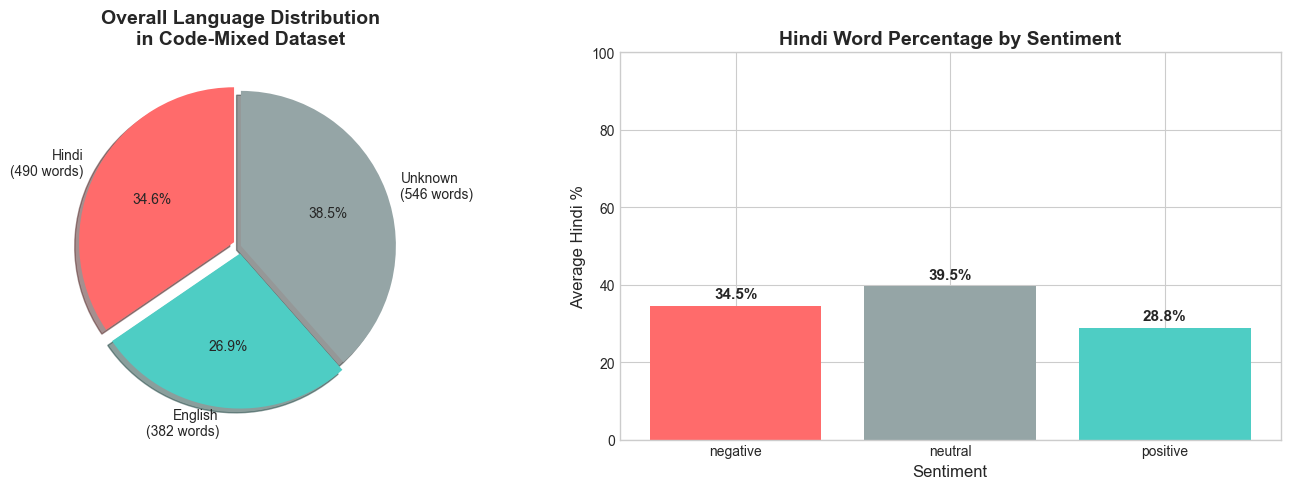

✓ Saved: results/language_distribution.png


In [5]:
# Cell 5: Language Distribution Pie Chart

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart - Overall language distribution
total_hindi = lang_df['hindi'].sum()
total_english = lang_df['english'].sum()
total_unknown = lang_df['unknown'].sum()

colors = ['#FF6B6B', '#4ECDC4', '#95A5A6']
sizes = [total_hindi, total_english, total_unknown]
labels = [f'Hindi\n({total_hindi} words)', f'English\n({total_english} words)', f'Unknown\n({total_unknown} words)']

axes[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
            explode=(0.05, 0.05, 0), shadow=True)
axes[0].set_title('Overall Language Distribution\nin Code-Mixed Dataset', fontsize=14, fontweight='bold')

# Bar chart - Hindi percentage by sentiment
sentiment_hindi = all_df.groupby('label')['hindi_percentage'].mean()

bars = axes[1].bar(sentiment_hindi.index, sentiment_hindi.values, color=['#FF6B6B', '#95A5A6', '#4ECDC4'])
axes[1].set_xlabel('Sentiment', fontsize=12)
axes[1].set_ylabel('Average Hindi %', fontsize=12)
axes[1].set_title('Hindi Word Percentage by Sentiment', fontsize=14, fontweight='bold')
axes[1].set_ylim(0, 100)

# Add value labels on bars
for bar, val in zip(bars, sentiment_hindi.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                 f'{val:.1f}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/language_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Saved: results/language_distribution.png")

In [6]:
# Cell 6: Phoneme Frequency Analysis

def extract_phonemes(phonetic_str):
    """Extract individual phonemes from phonetic string."""
    # Remove slashes and split
    clean = phonetic_str.strip('/')
    # Split by space and get individual phoneme sequences
    return clean.split()

# Get all phonemes
all_phonemes = []
for phonetic in all_df['phonetic']:
    all_phonemes.extend(extract_phonemes(phonetic))

# Count frequencies
phoneme_counts = Counter(all_phonemes)

# Top 20 most common phonemes
print("Top 20 Most Common Phonemes/Words:")
print("=" * 40)
for phoneme, count in phoneme_counts.most_common(20):
    print(f"  {phoneme:<15} : {count:>4} times")

Top 20 Most Common Phonemes/Words:
  hɛː             :   65 times
  hoː             :   29 times
  bəhʊt           :   23 times
  gəjaː           :   20 times
  rəhaː           :   20 times
  kjaː            :   19 times
  mẽː             :   19 times
  gəjiː           :   16 times
  kərnaː          :   16 times
  hũː             :   14 times
  tʰaː            :   13 times
  ɪz              :   12 times
  fiːlɪŋ          :   11 times
  kiː             :   11 times
  nəhĩː           :   11 times
  seː             :   10 times
  fɔːr            :   10 times
  toː             :    9 times
  peː             :    9 times
  oːf             :    9 times


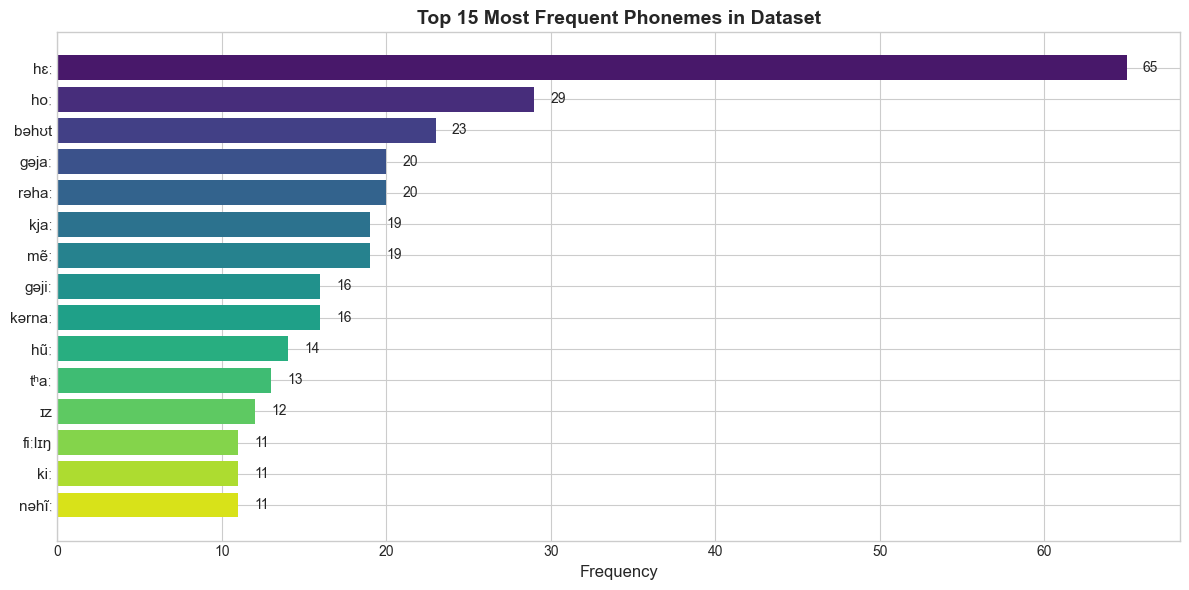

✓ Saved: results/phoneme_frequency.png


In [7]:
# Cell 7: Visualize Top Phonemes

# Get top 15 phonemes
top_phonemes = phoneme_counts.most_common(15)
phonemes = [p[0] for p in top_phonemes]
counts = [p[1] for p in top_phonemes]

# Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.barh(range(len(phonemes)), counts, color=sns.color_palette("viridis", len(phonemes)))
ax.set_yticks(range(len(phonemes)))
ax.set_yticklabels(phonemes, fontsize=11)
ax.invert_yaxis()  # Top phoneme at top
ax.set_xlabel('Frequency', fontsize=12)
ax.set_title('Top 15 Most Frequent Phonemes in Dataset', fontsize=14, fontweight='bold')

# Add count labels
for i, (bar, count) in enumerate(zip(bars, counts)):
    ax.text(count + 1, i, str(count), va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../results/phoneme_frequency.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Saved: results/phoneme_frequency.png")

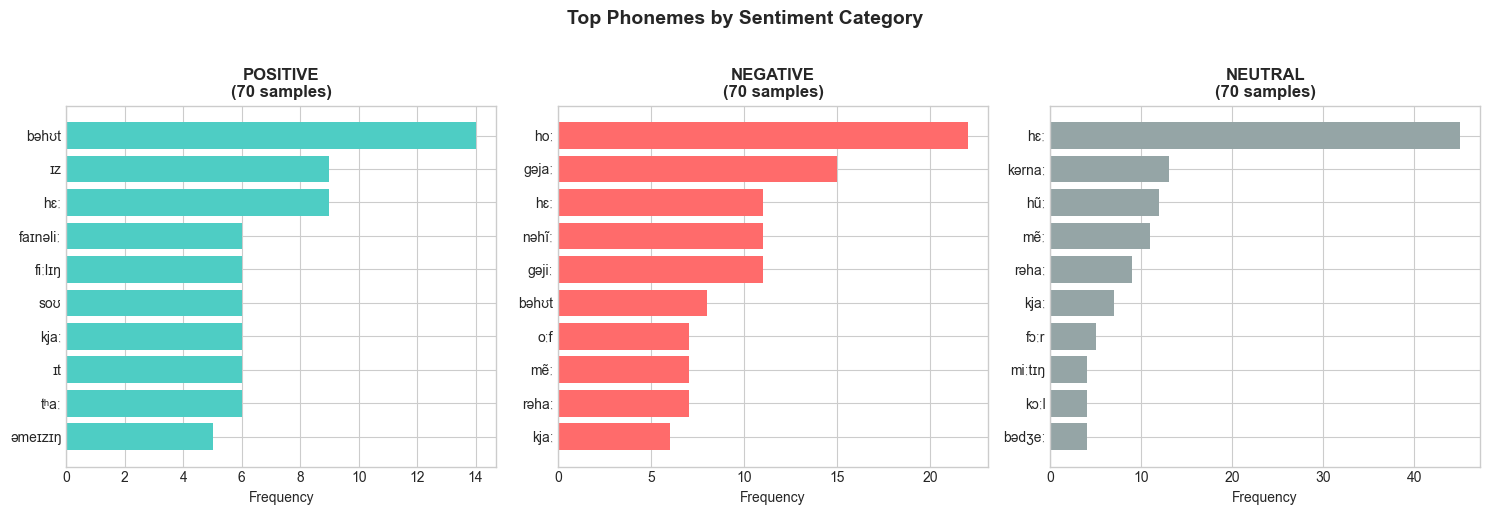

✓ Saved: results/phonemes_by_sentiment.png


In [8]:
# Cell 8: Compare Phonetic Patterns by Sentiment

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sentiments = ['positive', 'negative', 'neutral']
colors = ['#4ECDC4', '#FF6B6B', '#95A5A6']

for idx, (sentiment, color) in enumerate(zip(sentiments, colors)):
    # Filter by sentiment
    sentiment_df = all_df[all_df['label'] == sentiment]
    
    # Get phonemes for this sentiment
    sentiment_phonemes = []
    for phonetic in sentiment_df['phonetic']:
        sentiment_phonemes.extend(extract_phonemes(phonetic))
    
    # Count and get top 10
    sent_counts = Counter(sentiment_phonemes)
    top_10 = sent_counts.most_common(10)
    
    # Plot
    phonemes = [p[0] for p in top_10]
    counts = [p[1] for p in top_10]
    
    axes[idx].barh(range(len(phonemes)), counts, color=color)
    axes[idx].set_yticks(range(len(phonemes)))
    axes[idx].set_yticklabels(phonemes, fontsize=10)
    axes[idx].invert_yaxis()
    axes[idx].set_title(f'{sentiment.upper()}\n({len(sentiment_df)} samples)', 
                        fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Frequency')

plt.suptitle('Top Phonemes by Sentiment Category', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../results/phonemes_by_sentiment.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Saved: results/phonemes_by_sentiment.png")

In [ ]:
# Cell 9: Final Summary

print("=" * 60)
print("PHASE 2 COMPLETE - PHONETIC ANALYSIS SUMMARY")
print("=" * 60)

print("\n📊 DATASET STATISTICS:")
print(f"   Total samples processed: {len(all_df)}")
print(f"   Training samples: {len(train_df)}")
print(f"   Validation samples: {len(val_df)}")
print(f"   Test samples: {len(test_df)}")

print("\n🗣️ LANGUAGE BREAKDOWN:")
print(f"   Total Hindi words: {lang_df['hindi'].sum()}")
print(f"   Total English words: {lang_df['english'].sum()}")
print(f"   Average Hindi percentage: {all_df['hindi_percentage'].mean():.1f}%")
print(f"   Average words per text: {all_df['total_words'].mean():.1f}")

print("\n🔤 PHONETIC CONVERSION:")
print(f"   Unique phoneme patterns: {len(phoneme_counts)}")
print(f"   Most common phoneme: {phoneme_counts.most_common(1)[0][0]}")

print("\n📁 FILES CREATED:")
print("   ✓ data/processed/train_phonetic.csv")
print("   ✓ data/processed/val_phonetic.csv")
print("   ✓ data/processed/test_phonetic.csv")
print("   ✓ results/language_distribution.png")
print("   ✓ results/phoneme_frequency.png")
print("   ✓ results/phonemes_by_sentiment.png")

print("\n" + "=" * 60)
print("next - Phase 3: Model Training!")
print("=" * 60)

PHASE 2 COMPLETE - PHONETIC ANALYSIS SUMMARY

📊 DATASET STATISTICS:
   Total samples processed: 210
   Training samples: 150
   Validation samples: 30
   Test samples: 30

🗣️ LANGUAGE BREAKDOWN:
   Total Hindi words: 490
   Total English words: 382
   Average Hindi percentage: 34.3%
   Average words per text: 6.8

🔤 PHONETIC CONVERSION:
   Unique phoneme patterns: 698
   Most common phoneme: hɛː

📁 FILES CREATED:
   ✓ data/processed/train_phonetic.csv
   ✓ data/processed/val_phonetic.csv
   ✓ data/processed/test_phonetic.csv
   ✓ results/language_distribution.png
   ✓ results/phoneme_frequency.png
   ✓ results/phonemes_by_sentiment.png

🎉 Ready for Phase 3: Model Training!
